In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x +5
f(3.0)

20.0

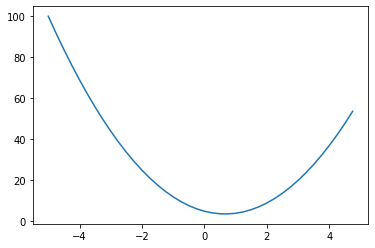

In [3]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [4]:
h = 0.00000001
x = -3.0
(f(x+h) - f(x))/h # Definition of a gradient; for a very small val of h i.e h -> 0, derivative = (f(x+h) - f(x))/h

-22.00000039920269

In [5]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [6]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c

a+=h
d2 = a*b + c

# Derivative w.r.t a is the derivative when the val of a is bumped by a h amount
print('d1: ', d1)
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


In [32]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')
        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')
        return out

    
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0,label='f')
L = f * d; L.label = 'L'
L

Value(data=-8.0)

In [14]:
# !pip install graphviz

In [19]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

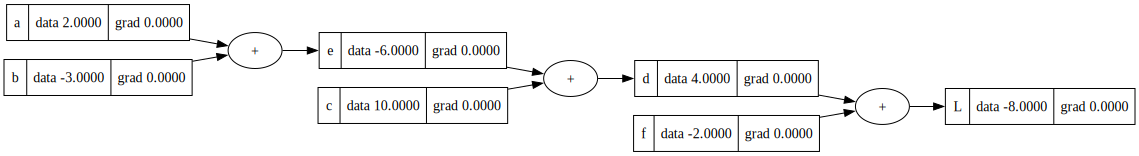

In [26]:
draw_dot(L)

In [23]:
a.data += 0.01 + a.grad
b.data += 0.01 + b.grad
c.data += 0.01 + c.grad
f.data += 0.01 + f.grad

e = a*b
d = e + c
L = f * d

print(L.data)

-7.920792


In [27]:
def example_1():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data
  
  print((L2 - L1)/h)
  
example_1()

-3.9999999999995595


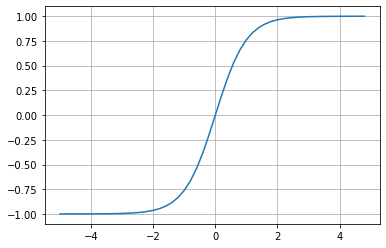

In [28]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid()

In [49]:
# Simple NN

# 1 Inputs

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# 2 Weights

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#  3 bias

b = Value(6.88137, label='b')

#  Hidden layer
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1w1 + x2w2'

# Output
n = x1w1_x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' # tanh activation for final output

# tanh = (e^2x - 1)/(e^2x + 1)



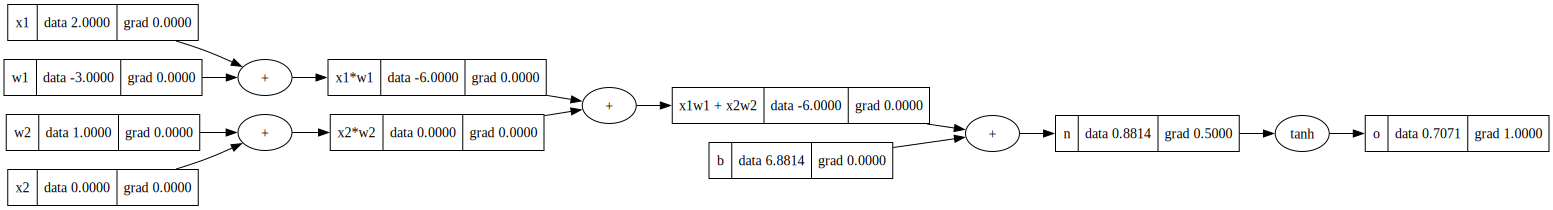

In [53]:
draw_dot(o)

In [51]:
o.grad = 1.0

O = tanh(n)

dO/dn = 1 - (tanh(n))**2

=> 1 - O**2

In [46]:
1 - o.data**2

0.5000025364090595

In [52]:
n.grad = 0.5

The gradient of the input nodes to n w.r.t n is

        ==> d(x1*w1 + x2*w2)/dn = 1

        ==> d(b)/dn = 1

Hence the grad of n is distributed into the input nodes as:

grad(x1*w1 + x2*w2) = 1 * grad(n)

grad(b) = 1 * grad(n)

In [54]:
x1w1_x2w2.grad = 0.5
b.grad = 0.5

In [55]:
# Similarly

x1w1.grad = 0.5
x2w2.grad = 0.5

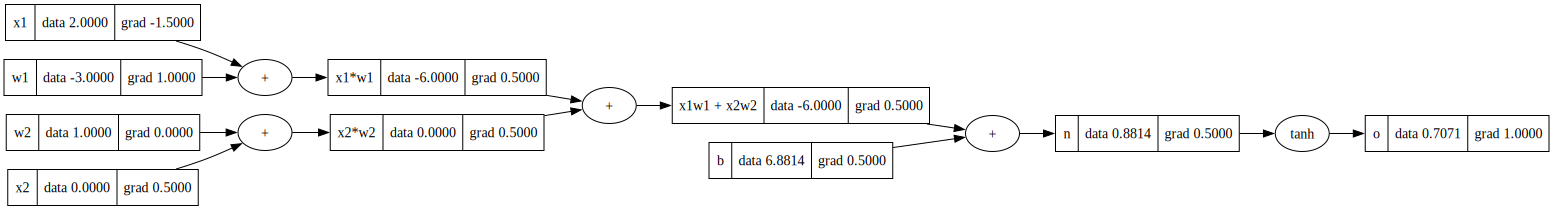

In [58]:
draw_dot(o)

In [57]:
# Gradient of x1*w1 w.r.t x1
x1.grad = w1.data * x1w1.grad
# Gradient of x1*w1 w.r.t w1
w1.grad = x1.data * x1w1.grad

# Gradient of x2*w2 w.r.t x2
x2.grad = w2.data * x2w2.grad
# Gradient of x2*w2 w.r.t w2
w2.grad = x2.data * x2w2.grad

Implementing BackProp by codifying the functions to calc grad

In [69]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        # New backward feature
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')
        # 
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')

        # 
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data *  out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')

        # 
        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out

In [70]:
# Simple NN

# 1 Inputs

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

# 2 Weights

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

#  3 bias

b = Value(6.88137, label='b')

#  Hidden layer
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1w1 + x2w2'

# Output
n = x1w1_x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' # tanh activation for final output

# tanh = (e^2x - 1)/(e^2x + 1)

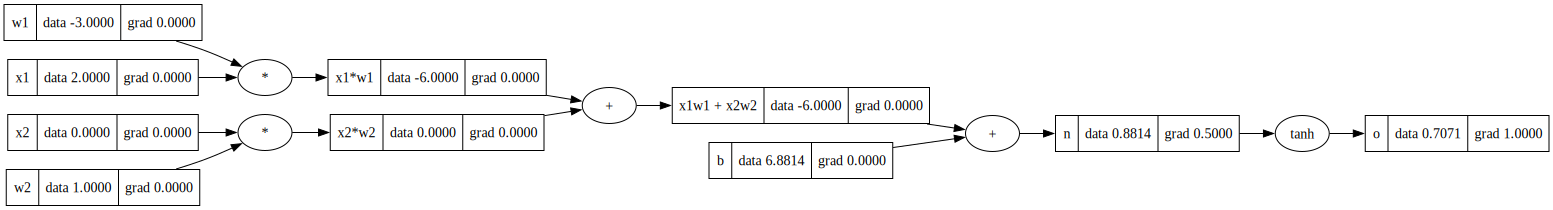

In [73]:
draw_dot(o)

In [72]:
# Init grad of output to 1
o.grad = 1.0
o._backward()

In [74]:
n._backward()

# Wont do anything cause b is a leaf node
b._backward()

x1w1_x2w2._backward()
x1w1._backward()
x2w2._backward()

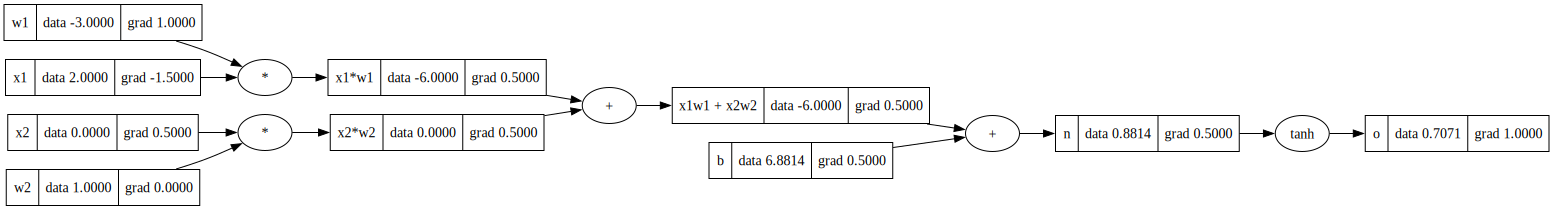

In [75]:
draw_dot(o)

Implementing TopoSort to Autograd

In [76]:
topo = []
visited = set()

def topoSort(node):
    if node not in visited:
        visited.add(node)
        for i in node._prev:
            topoSort(i)
        topo.append(node)

topoSort(o)
topo


[Value(data=6.88137),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813700000000004),
 Value(data=0.7071049876722272)]

1. Reset Gradients

In [90]:

x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1w1 + x2w2'
n = x1w1_x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o' # tanh activation for final output

In [78]:
o.grad = 1.0

topo = []
visited = set()

def topoSort(node):
    if node not in visited:
        visited.add(node)
        for i in node._prev:
            topoSort(i)
        topo.append(node)

topoSort(o)

for node in reversed(topo):
    node._backward()

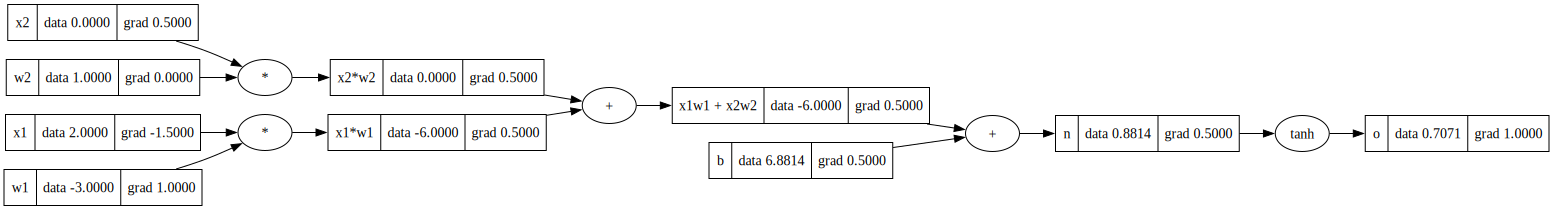

In [79]:
draw_dot(o)

2. Add the topoSort to backward in the Value Class

In [89]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0

        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data *  out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out

# Adding the backward feature
    def backward(self):
        

        topo = []
        visited = set()

        def topoSort(node):
            if node not in visited:
                visited.add(node)
                for i in node._prev:
                    topoSort(i)
                topo.append(node)
        self.grad = 1.0
        topoSort(self)

        for node in reversed(topo):
            node._backward()
        

In [91]:

o.backward()

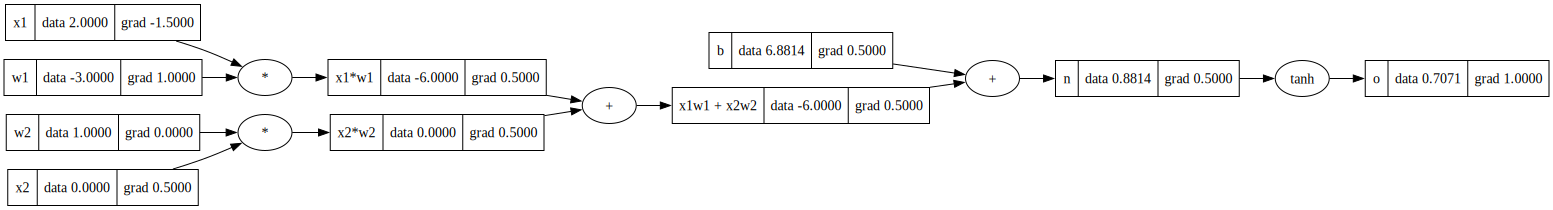

In [92]:
draw_dot(o)

The issue with the current computational graphs is that if a var is used more than once, it's gradients are reset everytime it's accessed by parent node.

In the following examples, the gradient is overwritten when accessed more than once.

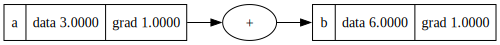

In [93]:
a = Value(3.0,label='a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

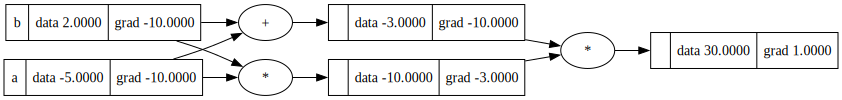

In [94]:
a = Value(-5.0,label='a')
b = Value(2.0, label= 'b')
c = a+b ; label = 'c'
d = a*b ; label = 'd'
e = d*c ; label = 'e'

e.backward()
draw_dot(e)



Solution: Accumulate the gradient of the variables ( the multivariate case of chain rule)

In [95]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            # change self.grad = 1.0 * out.grad to,
            self.grad += 1.0 * out.grad
            # Similarly
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            # 
            self.grad += other.data * out.grad
            other.grad += self.data *  out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')

        def _backward():
            # 
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        

        topo = []
        visited = set()

        def topoSort(node):
            if node not in visited:
                visited.add(node)
                for i in node._prev:
                    topoSort(i)
                topo.append(node)
        self.grad = 1.0
        topoSort(self)

        for node in reversed(topo):
            node._backward()
       

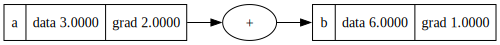

In [96]:
a = Value(3.0,label='a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)

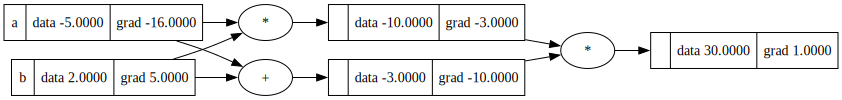

In [97]:
a = Value(-5.0,label='a')
b = Value(2.0, label= 'b')
c = a+b ; label = 'c'
d = a*b ; label = 'd'
e = d*c ; label = 'e'

e.backward()
draw_dot(e)



Fixing Bugs !!

1. When var is multiplied by a number:
    ex: a * 2
    Since 2 is not of type Value, it throws an error as __mul can't handle it.
    
2. When number is multiplied by var:
    After resolving the the prev issue, 
    if 2 * a is done, it throws an error,
    and to correct this we implement __rmul, which also tries a * 2 to check if this works.
    Python uses this as a fallback function when __mul fails.

In [100]:
#  The below case fails as explained before

a = Value(2.0)
2 * a

TypeError: unsupported operand type(s) for *: 'int' and 'Value'

In [101]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out

    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data *  out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self,other):
        return self * other # other * self, the two are actually interchanged
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        
        topo = []
        visited = set()

        def topoSort(node):
            if node not in visited:
                visited.add(node)
                for i in node._prev:
                    topoSort(i)
                topo.append(node)
        self.grad = 1.0
        topoSort(self)

        for node in reversed(topo):
            node._backward()
       

In [104]:
a = Value(2.0)
print(2 * a)
print(a * 2)

Value(data=4.0)
Value(data=4.0)


Implementing the Exponetiation and Power function for tanh()

(Simple excersice for backward diff and implenting tanh = (e^2x) - 1) / (e^2x + 1)

In [121]:
class Value:
    def __init__(self,data,_children=(),_op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        if not isinstance(other, Value):
            other = Value(other)

        out = Value(self.data + other.data, (self,other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad

        out._backward = _backward

        return out
    
    def __radd__(self, other):
        return self.__add__(other)

    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data *  out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self,other):
        return self * other
    
    def __pow__(self, other):
        assert isinstance(other,(int,float))
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * self.data ** (other - 1) * out.grad
        out._backward = _backward

        return out
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return -1*self
    
    def __sub__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        return self + (-other)
    
    def __rsub__(self, other):
        return self.__sub__(other)
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/ (math.exp(2*n) + 1)
        out = Value(t,(self,),'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad

        out._backward = _backward
        return out

    def backward(self):
        
        topo = []
        visited = set()

        def topoSort(node):
            if node not in visited:
                visited.add(node)
                for i in node._prev:
                    topoSort(i)
                topo.append(node)
        self.grad = 1.0
        topoSort(self)

        for node in reversed(topo):
            node._backward()
       

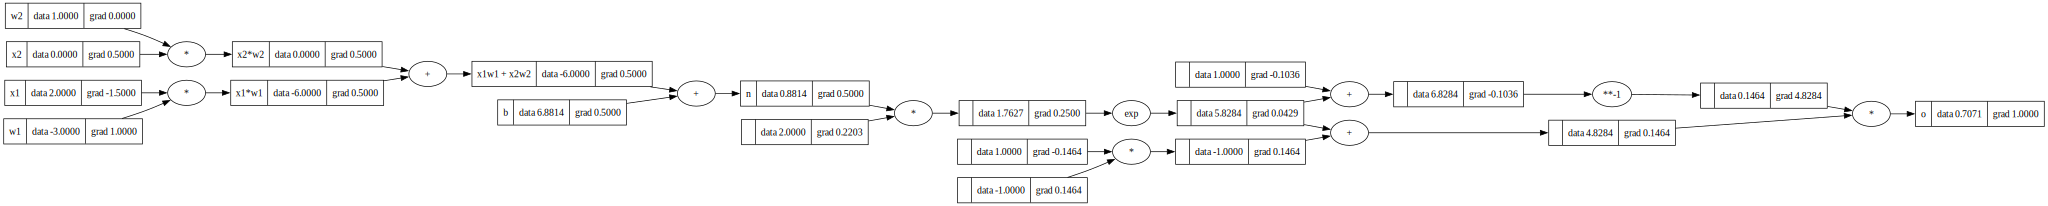

In [122]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1_x2w2 = x1w1 + x2w2; x1w1_x2w2.label = 'x1w1 + x2w2'
n = x1w1_x2w2 + b; n.label = 'n'

e = (2*n).exp()
o = (e-1)/(e+1)

o.label = 'o'
o.backward()
draw_dot(o)

Building a NueralNet (MLP) using autograd

In [239]:
import random


class Neuron():

    def __init__(self,nIn):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nIn)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        act = sum((wi*xi for wi, xi in zip(self.w,x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer():

    def __init__(self, nIn, nOut):
        self.neurons = [Neuron(nIn) for _ in range(nOut)]

    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP():

    def __init__(self, nIn, nOuts):
        sz = [nIn] + nOuts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nOuts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

x = [2, 3, -1]
n = MLP(3, [4,4,1])
n(x)


Value(data=-0.16962049957539385)

In [240]:
n.parameters()
# len(n.parameters())

[Value(data=-0.19375767597497418),
 Value(data=0.8364346032417689),
 Value(data=-0.06368627437718422),
 Value(data=-0.8673754562447726),
 Value(data=0.4326065635921734),
 Value(data=-0.74573346721582),
 Value(data=-0.4313906095922939),
 Value(data=-0.6020917737826164),
 Value(data=0.5532474728709817),
 Value(data=0.41436645983881726),
 Value(data=-0.8215634683590194),
 Value(data=-0.7204280603155389),
 Value(data=0.37550553608505144),
 Value(data=-0.15067954800759242),
 Value(data=0.1972810550037627),
 Value(data=-0.8567002552876046),
 Value(data=0.5438069735651461),
 Value(data=-0.29585104530841333),
 Value(data=-0.9023874923503961),
 Value(data=0.08455501410401611),
 Value(data=0.9161222003047924),
 Value(data=-0.03821006845751018),
 Value(data=-0.14354130460211634),
 Value(data=0.5748393490407699),
 Value(data=-0.3745910540820978),
 Value(data=-0.6778364618871826),
 Value(data=0.5421766915393331),
 Value(data=-0.32545158542077823),
 Value(data=-0.3680511401889799),
 Value(data=-0.15

In [243]:
xs = [
    [2, 3, -1],
    [3, -1, 0.5],
    [0.5, 1, 1],
    [1, 1, -1]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9266180447673751),
 Value(data=-0.9996976889260295),
 Value(data=-0.933218186961716),
 Value(data=0.9242501197584098)]

Running the below cell, the loss is decreased

1. Forward Pass
2. Backward Pass
3. Update

In [244]:
epochs = 10
for k in range(epochs):
    # forward pass
    ypred = [n(x) for x in xs]
    loss = sum([(yout - yact)**2 for yact, yout in zip(ys,ypred)])
    # backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # Update
    for p in n.parameters():
        p.data += -0.05 * p.grad
    
    print(k,loss.data)

0 0.015582857655043997
1 0.01336590379050015
2 0.012202984438527903
3 0.011378764591881065
4 0.010723115959149607
5 0.010170676574948277
6 0.009689673729293368
7 0.009262163357263157
8 0.008876880730418278
9 0.008526179227035916


In [245]:
ypred

[Value(data=0.9386083951085644),
 Value(data=-0.9997196526697737),
 Value(data=-0.9733864076572071),
 Value(data=0.9363691255452524)]